In [21]:
import numpy as np
import random

In [1]:
class Maze:
    @property
    def Width(self):
        pass
    @Width.setter
    def Width(self,Width):
        self.__Width = Width
    @Width.getter
    def Width(self):
        return self.__Width
    
    @property
    def Height(self):
        pass
    @Height.setter
    def Height(self,Height):
        self.__Height = Height
    @Height.getter
    def Height(self):
        return self.__Height

In [238]:

class WallExtend(Maze):
    def __init__(self,width,height):
        #サイズ調整
        if width<5:
            width = 5
        if height<5:
            height = 5
        if width%2==0:
            width+=1
        if height%2==0:
            height+=1
        #初期値設定
        self.Width = width
        self.Height = height
        self.__Maze = np.zeros((width,height))
        self.Wall = 1
        self.Path = 0
        self.Candidate = []
        self.CurrentWallCells = []
        self.Direction = {"Up":0,"Right":1,"Down":2,"Left":3}
    #メイン関数
    def MazeMake(self):
        #基盤となる迷路を作る
        self.MakeBaseMaze()
        #壁伸ばし処理
        self.Extend()
        self.__Maze[1,0] = self.Path
        self.__Maze[self.Width-2,self.Height-1] = self.Path
        
    def NextStep(self):
        self.__Maze[1,0] = self.Wall
        self.__Maze[self.Width-2,self.Height-1] = self.Wall
        for y in range(self.Height):
            for x in range(self.Width):
                if x == 0 or y == 0 or x == self.Width-1 or y == self.Height-1:
                    pass
                else:
                    if x%2==0 and y %2==0 and self.__Maze[x,y]==self.Path:
                        cell = {"X":x,"Y":y}
                        self.Candidate.append(cell)
        self.Extend()
        self.__Maze[1,0] = self.Path
        self.__Maze[self.Width-2,self.Height-1] = self.Path
        
    #迷路の外形を作る        
    def MakeBaseMaze(self):
        for y in range(self.Height):
            for x in range(self.Width):
                if x == 0 or y == 0 or x == self.Width-1 or y == self.Height-1:
                    self.__Maze[x,y] = self.Wall
                else:
                    self.__Maze[x,y] = self.Path
                    if x%2==0 and y %2==0:
                        cell = {"X":x,"Y":y}
                        self.Candidate.append(cell)
    def Extend(self):
        n = 0
        while len(self.Candidate)!=0:
            index = random.randrange(len(self.Candidate))
            cell = self.Candidate.pop(index)
            x = cell["X"]
            y = cell["Y"]
            
            if self.__Maze[x,y]==self.Path:
                self.CurrentWallCells = []
                self.ExtendWall(x,y)
    def SetWall(self,x,y):
        self.__Maze[x,y] = self.Wall
        if x%2==0 and y %2==0:
            self.CurrentWallCells.append({"X":x,"Y":y})
            
    def MakeDirections(self,directions,x,y):
        if self.__Maze[x,y-1]==self.Path and self.IsCurrentWall(x,y-2)==0:
            directions.append(self.Direction["Up"])
        if  self.__Maze[x+1,y]==self.Path and self.IsCurrentWall(x+2,y)==0:
            directions.append(self.Direction["Right"])
        if  self.__Maze[x,y+1]==self.Path and self.IsCurrentWall(x,y+2)==0:
            directions.append(self.Direction["Down"])
        if  self.__Maze[x-1,y]==self.Path and self.IsCurrentWall(x-2,y)==0:
            directions.append(self.Direction["Left"])
        return directions
    
    def ExtendWall(self,x,y):
        #進むことのできる方向を取得
        directions = []
        directions = self.MakeDirections(directions,x,y)
        #進行できるなら
        if len(directions)!=0:
            self.SetWall(x,y)
            isPath = 0
            #該当する方向への処理を実行
            x,y,isPath = self.JudgeDirection(x,y,directions,isPath)
            #進んだ先が通路なら再帰的に処理を実行
            if isPath==1:
                self.ExtendWall(x,y)
        #進行できないなら
        else:
            beforeCell = self.CurrentWallCells.pop()
            self.ExtendWall(beforeCell["X"],beforeCell["Y"])
            
    def JudgeDirection(self,x,y,directions,isPath):
        dirIndex = random.randrange(len(directions))
        #進行方向が上なら
        if directions[dirIndex] == self.Direction["Up"]:
            if self.__Maze[x,y-2] == self.Path:
                isPath = 1
            y = y-1
            self.SetWall(x,y)
            y = y-1
            self.SetWall(x,y)
        #進行方向が右なら   
        elif directions[dirIndex] == self.Direction["Right"]:
            if self.__Maze[x+2,y] == self.Path:
                isPath = 1
            x = x+1
            self.SetWall(x,y)
            x = x+1
            self.SetWall(x,y)
        #進行方向が下なら    
        elif directions[dirIndex] == self.Direction["Down"]:
            if self.__Maze[x,y+2] == self.Path:
                isPath = 1
            y = y+1
            self.SetWall(x,y)
            y = y+1
            self.SetWall(x,y)
        #進行方向が左なら
        elif directions[dirIndex] == self.Direction["Left"]:
            if self.__Maze[x-2,y] == self.Path:
                isPath = 1
            x = x-1
            self.SetWall(x,y)
            x = x-1
            self.SetWall(x,y)
        return x,y,isPath
            
    def IsCurrentWall(self,x,y):
        for i in range(len(self.CurrentWallCells)):
            cell = self.CurrentWallCells[i]
            if cell["X"] == x and cell["Y"] == y:
                return 1
        return 0
    
    def GetMaze(self):
        return self.__Maze

In [45]:
import matplotlib.pyplot as plt
import numpy as np
def img_show(img:np.ndarray,cmap = 'gray',vmin=0,vmax=255,interpolation='none')->None:
    img = np.clip(img,vmin,vmax).astype(np.uint8)
         
    plt.imshow(img,cmap = cmap,vmin=vmin,vmax=vmax,interpolation=interpolation)
    #画像を表示
    plt.show()
    plt.close()

In [158]:
import copy
def Debug(maze,width,height):
    m = copy.deepcopy(maze.T)
    for j in range(width+1):
        for i in range(height+1):
            m[i][j]=1-m[i][j]
    img_show(255*m)

In [12]:
cell = {"X":1,"Y":2}

In [13]:
print(cell["X"])

1


In [4]:
apend = []
apend.append(cell)

In [241]:
width = 120
height = 60
creator = WallExtend(width,height)
creator.MazeMake()
maze = creator.GetMaze()

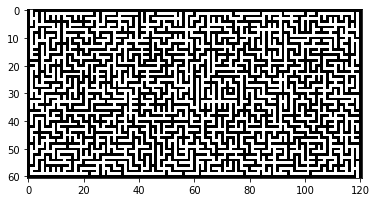

In [242]:
Debug(maze,width,height)

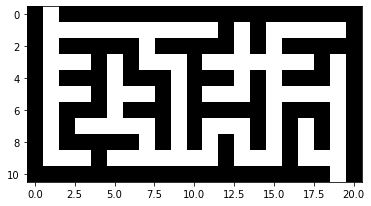

In [228]:
Debug(maze,width,height)